k_best:  3
accuracy:  0.7421875
混淆矩阵:
[[61 18]
 [15 34]]


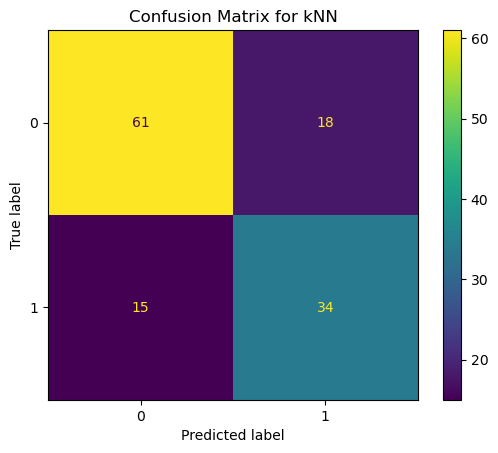

ROC AUC: 0.7649


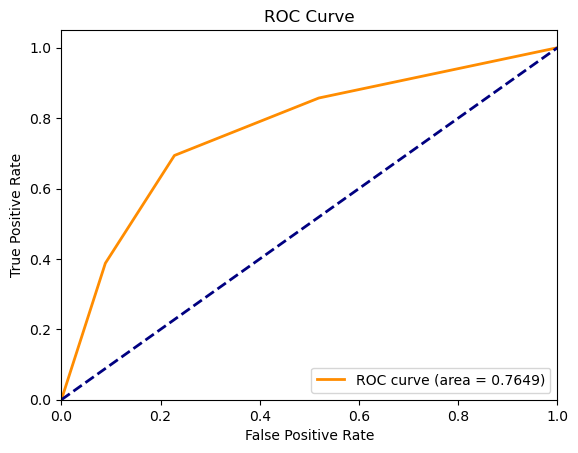

SVM ROC AUC: 0.7512
Naive Bayes ROC AUC: 0.7778


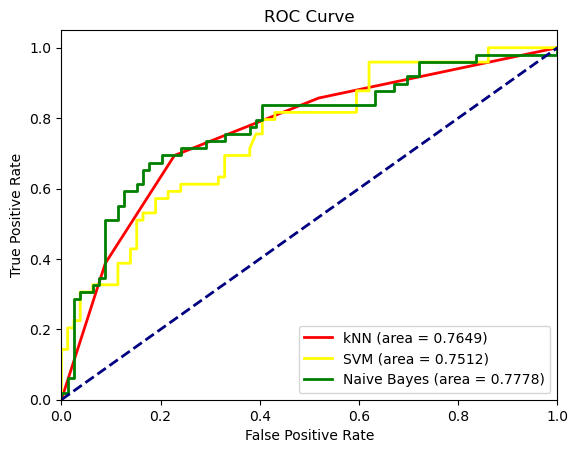

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt

# 读取训练和测试数据
x_train = pd.read_csv('cancer_x_train.csv', header=None)
y_train = pd.read_csv('cancer_y_train.csv', header=None).values.ravel()

x_test = pd.read_csv('cancer_x_test.csv', header=None)
y_test = pd.read_csv('cancer_y_test.csv', header=None).values.ravel()

# 寻找最佳k值
k_best = 1
accuracy_best = 0

for k in range(1, 101):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > accuracy_best:
        k_best = k
        accuracy_best = accuracy

print("k_best: ", k_best)
print("accuracy: ", accuracy_best)

# 使用最佳k值训练kNN分类器
knn = KNeighborsClassifier(n_neighbors=k_best)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

# 混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
print("混淆矩阵:")
print(conf_matrix)

# 绘制混淆矩阵
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title("Confusion Matrix for kNN")
plt.show()

# 计算并绘制ROC曲线
y_prob = knn.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC: {roc_auc:.4f}")

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# SVM
svm_classifier = SVC(probability=True)
svm_classifier.fit(x_train, y_train)
y_pred_svm = svm_classifier.predict(x_test)
y_prob_svm = svm_classifier.predict_proba(x_test)[:, 1]
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)
print(f"SVM ROC AUC: {roc_auc_svm:.4f}")

# Naïve Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)
y_pred_nb = nb_classifier.predict(x_test)
y_prob_nb = nb_classifier.predict_proba(x_test)[:, 1]
roc_auc_nb = roc_auc_score(y_test, y_prob_nb)
print(f"Naive Bayes ROC AUC: {roc_auc_nb:.4f}")

# 绘制ROC
plt.figure()
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, label=f'kNN (area = {roc_auc:.4f})')
plt.plot(fpr_svm, tpr_svm, color='yellow', lw=2, label=f'SVM (area = {roc_auc_svm:.4f})')
plt.plot(fpr_nb, tpr_nb, color='green', lw=2, label=f'Naive Bayes (area = {roc_auc_nb:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
